# Gibbs State

## Overview

The Gibbs state is an $n$-qubit mixed quantum state defined as a density matrix
$$ \rho := \frac{1}{Z} e^{-\beta H},\quad Z=\text{tr}(e^{-\beta H}). $$
This state is important in the application of quantum algorithms to quantum simulation, optimization, and machine learning.

The preparation of the Gibbs state can be viewed as implementing the mapping $H \mapsto \exp(-\beta H)$. Thus, the target function seemingly should be set to $f(x) = \exp (-\beta x)$. However, the parity condition is violated by this function and hence its implementation must be separated into even and odd components respectively, as in the Hamiltonian simulation example. The even/odd component of this function is hyperbolic cosine/sine, with values that blow up exponentially. Hence, naively implementing this function would cause an exponentially vanishing unnormalized quantum state. To remedy this, the Hamiltonian can first be shifted and scaled so as to be positive definite, i.e., there is a positive number $\delta > 0$ so that $\delta I \prec H \prec I$. Then, we only need a target function that agrees with $f$ on the interval $D = [\delta, 1]$, i.e.,
$$ \max_{x \in D} |h(x)- f(x)| < \epsilon. $$
Since the function is partially specified in a subinterval $D$, the best polynomial approximation $h(x)$ can be solved using our typical convex-optimization-based method.

## Setup and approximate target function

norm error = 7.1048080768587396e-09
max of solution = 0.7346270305559349


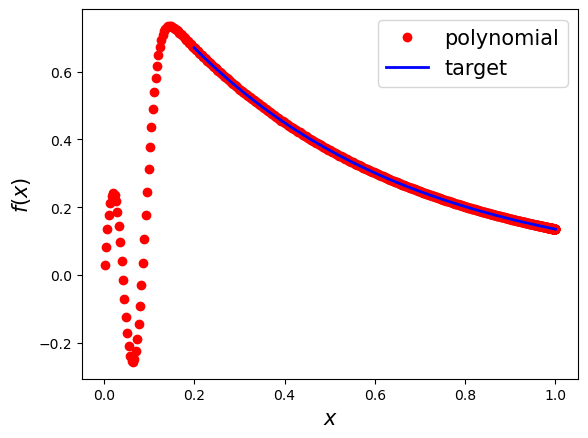

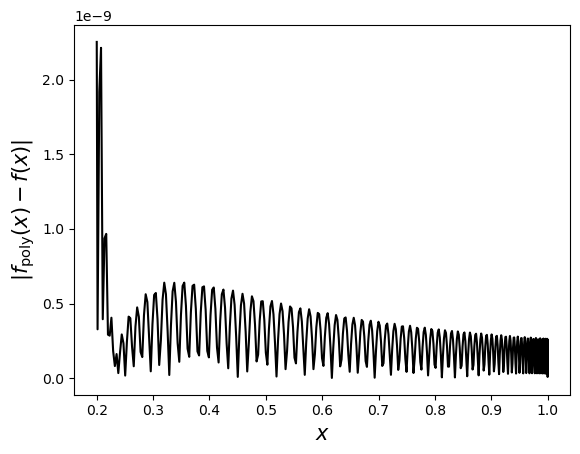

In [1]:
import numpy as np
from qsppack.utils import cvx_poly_coef

beta = 2
targ = lambda x: np.exp(-beta * x)
deg = 151
parity = deg % 2
delta = 0.2

opts = {
    'intervals': [delta, 1],
    'objnorm': 2,
    'epsil': 0.2,
    'npts': 500,
    'fscale': 1,
    'isplot': True,
    'method': 'cvxpy',
    'maxiter': 100,
    'criteria': 1e-12,
    'useReal': False,
    'targetPre': True
}

coef_full = cvx_poly_coef(targ, deg, opts)
coef = coef_full[parity::2]

## Solving the phase factors and verifying

iter err          
   1  +1.5632e-01
   2  +8.4444e-03
   3  +3.0174e-05
   4  +3.7987e-10
Stop criteria satisfied.
The residual error is
1.0658141036401503e-14


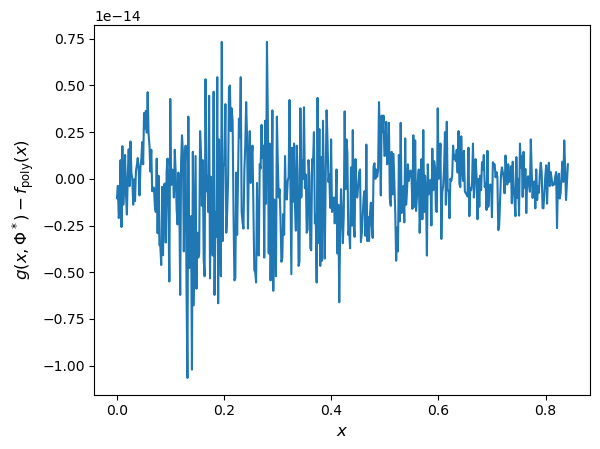

In [2]:
opts['method'] = 'Newton'

from qsppack.solver import solve
phi_proc, out = solve(coef, parity, opts)

from qsppack.utils import chebyshev_to_func, get_entry
import matplotlib.pyplot as plt

xlist = np.linspace(0, np.sin(1), 500)
func = lambda x: chebyshev_to_func(x, coef, parity, True)
targ_value = targ(xlist)
func_value = func(xlist)
QSP_value = get_entry(xlist, phi_proc, out)
err = np.linalg.norm(QSP_value - func_value, np.inf)
print('The residual error is')
print(err)

plt.plot(xlist, QSP_value - func_value)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$g(x,\\Phi^*)-f_\\mathrm{poly}(x)$', fontsize=12)
plt.show()

## Reference
1. Gilyén, A., Su, Y., Low, G. H., & Wiebe, N. (2019, June). Quantum singular value transformation and beyond: exponential improvements for quantum matrix arithmetics. In *Proceedings of the 51st Annual ACM SIGACT Symposium on Theory of Computing* (pp. 193-204).

2. Dong, Y., Meng, X., Whaley, K. B., & Lin, L. (2021). Efficient phase-factor evaluation in quantum signal processing. *Physical Review A*, 103(4), 042419.